In [1]:
from CompareAllGroups import *
from HeatmapFunctions import *
from FriedmanFinnerTests import run_tests

ano = '2019'

## 1. Ciências Humanas

In [2]:
auc_std_ch, auc_fav_ch, auc_ch = all_groups_std_df('CH', ano)
a = run_tests(auc_ch)

Friedman test & Finner test

[Friedman Test] Gender - pvalue: 0.4623
[Friedman Test] Race - pvalue: 0.6605
[Friedman Test] Income - pvalue: 0.2603
[Finner Test] Gender
   M vs F: 0.456
[Finner Test] Race
   White vs Black: 0.399
   White vs Pardo: 0.916
   White vs Pardo: 0.916
[Finner Test] Income
   Low vs High: 0.140
   Low vs Medium: 0.916
   Medium vs High: 0.171


## 2. Ciências da Natureza

In [3]:
auc_std_cn, auc_fav_cn, auc_cn = all_groups_std_df('CN', ano)
a = run_tests(auc_cn)

Friedman test & Finner test

[Friedman Test] Gender - pvalue: 0.8835
[Friedman Test] Race - pvalue: 0.0000
[Friedman Test] Income - pvalue: 0.0000
[Finner Test] Gender
   F vs M: 0.881
[Finner Test] Race
   Black vs White: 0.000
   Black vs Pardo: 0.000
   Pardo vs White: 0.461
[Finner Test] Income
   Low vs Medium: 0.000
   Low vs High: 0.000
   High vs Medium: 0.343


## 3. Matemática

In [4]:
auc_std_mt, auc_fav_mt, auc_mt = all_groups_std_df('MT', ano)
a = run_tests(auc_mt)

Friedman test & Finner test

[Friedman Test] Gender - pvalue: 0.8835
[Friedman Test] Race - pvalue: 0.6321
[Friedman Test] Income - pvalue: 0.3403
[Finner Test] Gender
   M vs F: 0.881
[Finner Test] Race
   Black vs Pardo: 0.343
   Black vs White: 0.527
   White vs Pardo: 0.752
[Finner Test] Income
   Low vs High: 0.171
   Low vs Medium: 0.833
   Medium vs High: 0.246


## 4. Linguagens e Códigos

In [5]:
item_ing = ['Item 55166', 'Item 54110', 'Item 23564', 'Item 31954', 'Item 118180']
item_esp = ['Item 96705', 'Item 118222','Item 39016', 'Item 118167', 'Item 48558']

auc_std_pt, auc_std_ing, auc_std_esp, auc_fav_pt, auc_fav_ing, auc_fav_esp, auc_pt, auc_ing, auc_esp = all_groups_std_df('LC', ano, item_ing, item_esp)

In [6]:
a = run_tests(auc_pt)

Friedman test & Finner test

[Friedman Test] Gender - pvalue: 0.0000
[Friedman Test] Race - pvalue: 0.0000
[Friedman Test] Income - pvalue: 0.0000
[Finner Test] Gender
   F vs M: 0.000
[Finner Test] Race
   Black vs White: 0.000
   Black vs Pardo: 0.000
   Pardo vs White: 0.000
[Finner Test] Income
   Low vs Medium: 0.000
   Low vs High: 0.000
   High vs Medium: 0.000


In [7]:
a = run_tests(auc_ing)

Friedman test & Finner test

[Friedman Test] Gender - pvalue: 0.0000
[Friedman Test] Race - pvalue: 0.0000
[Friedman Test] Income - pvalue: 0.0007
[Finner Test] Gender
   F vs M: 0.025
[Finner Test] Race
   Black vs White: 0.002
   Black vs Pardo: 0.114
   Pardo vs White: 0.114
[Finner Test] Income
   Low vs High: 0.004
   Low vs Medium: 0.058
   Medium vs High: 0.343


/home/vitoria/ENEM_TRI/Notebooks/stac/stac/nonparametric_tests.py:93: RuntimeWarning: divide by zero encountered in double_scalars
  iman_davenport = ((n-1)*chi2)/float((n*(k-1)-chi2))


In [8]:
a = run_tests(auc_esp)

Friedman test & Finner test

[Friedman Test] Gender - pvalue: 0.7040
[Friedman Test] Race - pvalue: 0.0000
[Friedman Test] Income - pvalue: 0.0000
[Finner Test] Gender
   M vs F: 0.655
[Finner Test] Race
   Black vs White: 0.002
   Black vs Pardo: 0.114
   Pardo vs White: 0.114
[Finner Test] Income
   Low vs High: 0.002
   Low vs Medium: 0.114
   Medium vs High: 0.114


# Heatmap

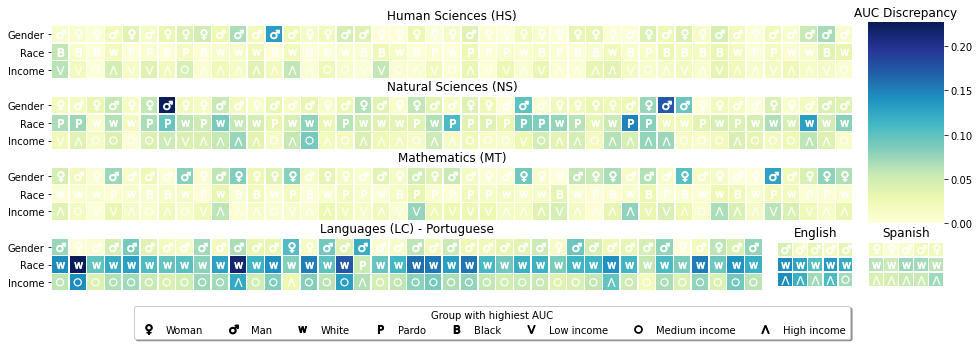

In [9]:
plot_all_hists(auc_std_ch, auc_std_cn, auc_std_mt, auc_std_esp, auc_std_ing, auc_std_pt, 
               auc_fav_ch, auc_fav_cn, auc_fav_mt, auc_fav_esp, auc_fav_ing, auc_fav_pt)